## Importando os dados do Caso 3 

In [73]:
setwd("/home/gustavo/Projeto de Dados/Análise_R/AP2/Caso_3")
getwd()

[1] "/home/gustavo/Projeto de Dados/Análise_R/AP2/Caso_3"

## Leitura dos Pacotes do R 

In [74]:
library(devtools)
library(vtable)
library(readxl)
library(tidyverse)
library(dplyr)
library(foreign)
library(plm)
library(stargazer)
library(MatchIt)

library(Matching)
library(ebal)

In [75]:
library("rbounds")

## Importação dos dados do Caso 3

In [76]:
caso_3 <- read_excel("/home/gustavo/Projeto de Dados/Análise_R/AP2/Caso_3/Caso_3.xlsx")
caso_3

id,pp,reg_pais1,reg_pais2,reg_pais3,reg_pais4,reg_pais5,reg_pais6,obito_ant,obito
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,1,0,1,0,1,71.734,105.92
2,0,1,0,0,0,0,1,86.913,124.93
3,0,0,1,0,1,1,0,72.985,106.93
4,1,0,0,1,1,1,0,91.888,116.64
5,0,0,0,0,0,0,0,62.233,93.01
6,0,1,1,0,0,0,1,76.610,104.03
7,1,0,1,1,0,1,1,89.615,116.68
8,1,0,0,1,0,0,0,69.145,87.43
9,1,0,0,0,1,1,1,119.291,151.06


############################### Letra A ########################################
# Indicação de desenho adequado para a identificação do efeito da PP

In [77]:
## Efeito de Politica por obito
epo = lm(obito_ant ~ obito, data = caso_3)
summary(epo)


Call:
lm(formula = obito_ant ~ obito, data = caso_3)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.3484  -5.1872   0.0681   5.2862  18.6784 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.530835   0.362921    18.0   <2e-16 ***
obito       0.682901   0.003172   215.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.768 on 9998 degrees of freedom
Multiple R-squared:  0.8225,	Adjusted R-squared:  0.8225 
F-statistic: 4.634e+04 on 1 and 9998 DF,  p-value: < 2.2e-16


## Variável ficticia do efeito PP por obito

In [78]:
vf = lm(obito_ant ~ obito + factor(pp), data = caso_3)
summary(vf)


Call:
lm(formula = obito_ant ~ obito + factor(pp), data = caso_3)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4019  -2.6889   0.0327   2.7095  13.8919 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.736278   0.242220   -40.2   <2e-16 ***
obito        0.775202   0.001969   393.7   <2e-16 ***
factor(pp)1 11.669605   0.084010   138.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.954 on 9997 degrees of freedom
Multiple R-squared:  0.9394,	Adjusted R-squared:  0.9394 
F-statistic: 7.753e+04 on 2 and 9997 DF,  p-value: < 2.2e-16


## Dentro do estimator de reg_pais1 para pp

In [79]:
## Estimator região_pais 1 
dentro_estimador1 = plm(obito ~ obito_ant + factor(reg_pais1), index = "pp", model = "within", data = caso_3) 
summary(dentro_estimador1)

Oneway (individual) effect Within Model

Call:
plm(formula = obito ~ obito_ant + factor(reg_pais1), data = caso_3, 
    model = "within", index = "pp")

Unbalanced Panel: n = 2, T = 4950-5050, N = 10000

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-17.121008  -3.409328  -0.065272   3.375048  17.993646 

Coefficients:
                    Estimate Std. Error  t-value Pr(>|t|)    
obito_ant          1.2131205  0.0031868 380.6667   <2e-16 ***
factor(reg_pais1)1 0.1590436  0.1023821   1.5534   0.1204    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    4032700
Residual Sum of Squares: 244250
R-Squared:      0.93943
Adj. R-Squared: 0.93941
F-statistic: 77520.4 on 2 and 9996 DF, p-value: < 2.22e-16

In [80]:
## Estimator região_pais 2 
dentro_estimador2 = plm(obito ~ obito_ant + factor(reg_pais2), index = "pp", model = "within", data = caso_3) 
summary(dentro_estimador2)

Oneway (individual) effect Within Model

Call:
plm(formula = obito ~ obito_ant + factor(reg_pais2), data = caso_3, 
    model = "within", index = "pp")

Unbalanced Panel: n = 2, T = 4950-5050, N = 10000

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-17.280159  -3.400739  -0.063592   3.378367  17.988399 

Coefficients:
                    Estimate Std. Error  t-value Pr(>|t|)    
obito_ant          1.2135498  0.0032444 374.0404  < 2e-16 ***
factor(reg_pais2)1 0.1739326  0.1042232   1.6688  0.09518 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    4032700
Residual Sum of Squares: 244240
R-Squared:      0.93943
Adj. R-Squared: 0.93942
F-statistic: 77523.5 on 2 and 9996 DF, p-value: < 2.22e-16

In [81]:
## Estimator região_pais 3
dentro_estimador3 = plm(obito ~ obito_ant + factor(reg_pais3), index = "pp", model = "within", data = caso_3) 
summary(dentro_estimador3)

Oneway (individual) effect Within Model

Call:
plm(formula = obito ~ obito_ant + factor(reg_pais3), data = caso_3, 
    model = "within", index = "pp")

Unbalanced Panel: n = 2, T = 4950-5050, N = 10000

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-17.239052  -3.408093  -0.056618   3.378953  18.037962 

Coefficients:
                     Estimate Std. Error  t-value Pr(>|t|)    
obito_ant           1.2121125  0.0031164 388.9427   <2e-16 ***
factor(reg_pais3)1 -0.0567572  0.1001220  -0.5669   0.5708    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    4032700
Residual Sum of Squares: 244300
R-Squared:      0.93942
Adj. R-Squared: 0.9394
F-statistic: 77503.2 on 2 and 9996 DF, p-value: < 2.22e-16

In [82]:
## Estimator região_pais 4
dentro_estimador4 = plm(obito ~ obito_ant + factor(reg_pais4), index = "pp", model = "within", data = caso_3) 
summary(dentro_estimador4)

Oneway (individual) effect Within Model

Call:
plm(formula = obito ~ obito_ant + factor(reg_pais4), data = caso_3, 
    model = "within", index = "pp")

Unbalanced Panel: n = 2, T = 4950-5050, N = 10000

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-17.163242  -3.409169  -0.062662   3.376716  18.111395 

Coefficients:
                     Estimate Std. Error  t-value Pr(>|t|)    
obito_ant           1.2126543  0.0032454 373.6537   <2e-16 ***
factor(reg_pais4)1 -0.0829162  0.1042590  -0.7953   0.4265    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    4032700
Residual Sum of Squares: 244300
R-Squared:      0.93942
Adj. R-Squared: 0.9394
F-statistic: 77505.7 on 2 and 9996 DF, p-value: < 2.22e-16

In [83]:
## Estimator região_pais 5
dentro_estimador5 = plm(obito ~ obito_ant + factor(reg_pais5), index = "pp", model = "within", data = caso_3) 
summary(dentro_estimador5)

Oneway (individual) effect Within Model

Call:
plm(formula = obito ~ obito_ant + factor(reg_pais5), data = caso_3, 
    model = "within", index = "pp")

Unbalanced Panel: n = 2, T = 4950-5050, N = 10000

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-17.229591  -3.406834  -0.055705   3.371548  18.045403 

Coefficients:
                     Estimate Std. Error  t-value Pr(>|t|)    
obito_ant           1.2125073  0.0034612 350.3095   <2e-16 ***
factor(reg_pais5)1 -0.0471539  0.1111949  -0.4241   0.6715    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    4032700
Residual Sum of Squares: 244310
R-Squared:      0.93942
Adj. R-Squared: 0.9394
F-statistic: 77502 on 2 and 9996 DF, p-value: < 2.22e-16

In [84]:
## Estimator região_pais 6
dentro_estimador6 = plm(obito ~ obito_ant + factor(reg_pais6), index = "pp", model = "within", data = caso_3) 
summary(dentro_estimador6)

Oneway (individual) effect Within Model

Call:
plm(formula = obito ~ obito_ant + factor(reg_pais6), data = caso_3, 
    model = "within", index = "pp")

Unbalanced Panel: n = 2, T = 4950-5050, N = 10000

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-17.345400  -3.416528  -0.052024   3.364239  18.332786 

Coefficients:
                     Estimate Std. Error  t-value  Pr(>|t|)    
obito_ant           1.2201849  0.0039053 312.4400 < 2.2e-16 ***
factor(reg_pais6)1 -0.4354900  0.1254976  -3.4701 0.0005224 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    4032700
Residual Sum of Squares: 244020
R-Squared:      0.93949
Adj. R-Squared: 0.93947
F-statistic: 77599.9 on 2 and 9996 DF, p-value: < 2.22e-16

######################### Letra B ##############################################

## Tabela de Balançeamento por estimação dos obitos e pop (Comparação entre pp e regiões)

In [85]:
## pp
sumtable(caso_3, group = 'pp', group.test = TRUE)

In [86]:
## reg_pais1
sumtable(caso_3, group = 'reg_pais1', group.test = TRUE)

In [87]:
## reg_pais2
sumtable(caso_3, group = 'reg_pais2', group.test = TRUE)

In [88]:
## reg_pais3
sumtable(caso_3, group = 'reg_pais3', group.test = TRUE)

In [89]:
## reg_pais4
sumtable(caso_3, group = 'reg_pais4', group.test = TRUE)

In [90]:
## reg_pais5
sumtable(caso_3, group = 'reg_pais5', group.test = TRUE)

In [91]:
## reg_pais6
sumtable(caso_3, group = 'reg_pais6', group.test = TRUE)

################################# Letra C #####################################

##  Matching, apresentar a tabela de balanceamento antes e depois do pareamento

## Indice de desempenho das pp por obito  

In [92]:
caso_3 %>% 
  group_by(pp) %>% 
  summarise(obito = n(),
            media_obito = mean(obito_ant), 
            desvio_obito = sd(obito_ant), 
            variância = var(obito_ant))

pp,obito,media_obito,desvio_obito,variância
<dbl>,<int>,<dbl>,<dbl>,<dbl>
0,4950,83.02845,16.10881,259.4939
1,5050,83.53513,16.01798,256.5756


## Indice de desempenho das regiões 1 por obito  

In [93]:
caso_3 %>% 
  group_by(reg_pais1) %>% 
  summarise(obito = n(),
            media_obito = mean(obito_ant), 
            desvio_obito = sd(obito_ant),
            variância = var(obito_ant))

reg_pais1,obito,media_obito,desvio_obito,variância
<dbl>,<int>,<dbl>,<dbl>,<dbl>
0,5039,87.42239,15.71357,246.9163
1,4961,79.08119,15.30888,234.3619


## Indice de desempenho das regiões 2 por obito


In [94]:
caso_3 %>% 
  group_by(reg_pais2) %>% 
  summarise(obito = n(),
            media_obito = mean(obito_ant), 
            desvio_obito = sd(obito_ant),
            variância = var(obito_ant))

reg_pais2,obito,media_obito,desvio_obito,variância
<dbl>,<int>,<dbl>,<dbl>,<dbl>
0,4979,88.38776,15.31675,234.6029
1,5021,78.22357,15.16313,229.9206


## Indice de desempenho das regiões 3 por obito

In [95]:
caso_3 %>% 
  group_by(reg_pais3) %>% 
  summarise(obito = n(),
            media_obito = mean(obito_ant), 
            desvio_obito = sd(obito_ant),
            variância = var(obito_ant))

reg_pais3,obito,media_obito,desvio_obito,variância
<dbl>,<int>,<dbl>,<dbl>,<dbl>
0,4968,80.75027,15.85026,251.2307
1,5032,85.78614,15.88236,252.2495


## Indice de desempenho das regiões 4 por obito

In [96]:
caso_3 %>% 
  group_by(reg_pais4) %>% 
  summarise(obito = n(),
            media_obito = mean(obito_ant), 
            desvio_obito = sd(obito_ant),
            variância = var(obito_ant))

reg_pais4,obito,media_obito,desvio_obito,variância
<dbl>,<int>,<dbl>,<dbl>,<dbl>
0,4977,78.16596,15.25271,232.6453
1,5023,88.35581,15.21849,231.6024


## Indice de desempenho das regiões 5 por obito

In [97]:
caso_3 %>% 
  group_by(reg_pais5) %>% 
  summarise(obito = n(),
            media_obito = mean(obito_ant), 
            desvio_obito = sd(obito_ant),
            variância = var(obito_ant))

reg_pais5,obito,media_obito,desvio_obito,variância
<dbl>,<int>,<dbl>,<dbl>,<dbl>
0,4995,75.92845,14.21001,201.9244
1,5005,90.62549,14.36026,206.2170


## Indice de desempenho das regiões 6 por obito

In [98]:
caso_3 %>% 
  group_by(reg_pais6) %>% 
  summarise(obito = n(),
            media_obito = mean(obito_ant), 
            desvio_obito = sd(obito_ant),
            variância = var(obito_ant))

reg_pais6,obito,media_obito,desvio_obito,variância
<dbl>,<int>,<dbl>,<dbl>,<dbl>
0,4868,73.12297,12.58016,158.2603
1,5132,92.92295,12.72362,161.8904


## Letra C 

##  Matching, apresentar a tabela de balanceamento antes e depois do pareamento

## PP

In [99]:
# Propensity Score Model de pp para obito
glm1 <- glm(pp ~ obito, family=binomial, data=caso_3)
summary(glm1)


Call:
glm(formula = pp ~ obito, family = binomial, data = caso_3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0005  -1.0747   0.5445   1.0643   2.0804  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.991863   0.125829   31.73   <2e-16 ***
obito       -0.035319   0.001102  -32.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13862  on 9999  degrees of freedom
Residual deviance: 12660  on 9998  degrees of freedom
AIC: 12664

Number of Fisher Scoring iterations: 4


In [100]:
# Propensity Score Model de pp para obito_ant
glm2 <- glm(pp ~ obito_ant, family=binomial, data=caso_3)
summary(glm2)


Call:
glm(formula = pp ~ obito_ant, family = binomial, data = caso_3)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.223  -1.186   1.139   1.169   1.206  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.143570   0.105638  -1.359    0.174
obito_ant    0.001964   0.001246   1.577    0.115

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13862  on 9999  degrees of freedom
Residual deviance: 13859  on 9998  degrees of freedom
AIC: 13863

Number of Fisher Scoring iterations: 3


## reg_pais1

In [101]:
# Propensity Score Model de regiao_1 para obito
glm3 <- glm(reg_pais1 ~ obito, family=binomial, data=caso_3)
summary(glm3)


Call:
glm(formula = reg_pais1 ~ obito, family = binomial, data = caso_3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7825  -1.1267  -0.7207   1.1365   1.8474  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.513319   0.114997   21.86   <2e-16 ***
obito       -0.022509   0.001007  -22.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13862  on 9999  degrees of freedom
Residual deviance: 13326  on 9998  degrees of freedom
AIC: 13330

Number of Fisher Scoring iterations: 4


In [102]:
# Propensity Score Model de regiao_2 para obito_ant
glm4 <- glm(reg_pais1 ~ obito_ant, family=binomial, data=caso_3)
summary(glm4)


Call:
glm(formula = reg_pais1 ~ obito_ant, family = binomial, data = caso_3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7303  -1.1125  -0.6727   1.1207   1.7476  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.843381   0.115243   24.67   <2e-16 ***
obito_ant   -0.034342   0.001362  -25.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13862  on 9999  degrees of freedom
Residual deviance: 13168  on 9998  degrees of freedom
AIC: 13172

Number of Fisher Scoring iterations: 4


## reg_pais2

In [103]:
# Propensity Score Model de regiao_2 para obito
glm4 <- glm(reg_pais2 ~ obito, family=binomial, data=caso_3)
summary(glm4)


Call:
glm(formula = reg_pais2 ~ obito, family = binomial, data = caso_3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8571  -1.1045   0.5838   1.1024   1.8659  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.280072   0.120094   27.31   <2e-16 ***
obito       -0.029104   0.001052  -27.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13863  on 9999  degrees of freedom
Residual deviance: 13006  on 9998  degrees of freedom
AIC: 13010

Number of Fisher Scoring iterations: 4


In [104]:
# Propensity Score Model de regiao_2 para obito_ant
glm5 <- glm(reg_pais2 ~ obito_ant, family=binomial, data=caso_3)
summary(glm5)


Call:
glm(formula = reg_pais2 ~ obito_ant, family = binomial, data = caso_3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8592  -1.0941   0.5579   1.0849   1.8146  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.606069   0.120746   29.86   <2e-16 ***
obito_ant   -0.043188   0.001427  -30.27   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13863  on 9999  degrees of freedom
Residual deviance: 12815  on 9998  degrees of freedom
AIC: 12819

Number of Fisher Scoring iterations: 4


## reg_pais3

In [105]:
# Propensity Score Model de regiao_3 para obito
glm6 <- glm(reg_pais3 ~ obito, family=binomial, data=caso_3)
summary(glm6)


Call:
glm(formula = reg_pais3 ~ obito, family = binomial, data = caso_3)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.548  -1.165   0.893   1.158   1.556  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.4486867  0.1098901  -13.18   <2e-16 ***
obito        0.0130057  0.0009614   13.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13863  on 9999  degrees of freedom
Residual deviance: 13675  on 9998  degrees of freedom
AIC: 13679

Number of Fisher Scoring iterations: 4


In [106]:
# Propensity Score Model de regiao_3 para obito
glm7 <- glm(reg_pais3 ~ obito, family=binomial, data=caso_3)
summary(glm7)


Call:
glm(formula = reg_pais3 ~ obito, family = binomial, data = caso_3)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.548  -1.165   0.893   1.158   1.556  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.4486867  0.1098901  -13.18   <2e-16 ***
obito        0.0130057  0.0009614   13.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13863  on 9999  degrees of freedom
Residual deviance: 13675  on 9998  degrees of freedom
AIC: 13679

Number of Fisher Scoring iterations: 4


In [107]:
# Propensity Score Model de regiao_3 para obito_ant
glm8 <- glm(reg_pais3 ~ obito_ant, family=binomial, data=caso_3)
summary(glm8)


Call:
glm(formula = reg_pais3 ~ obito_ant, family = binomial, data = caso_3)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.542  -1.160   0.858   1.152   1.518  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.647441   0.108924  -15.12   <2e-16 ***
obito_ant    0.019939   0.001286   15.51   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13863  on 9999  degrees of freedom
Residual deviance: 13614  on 9998  degrees of freedom
AIC: 13618

Number of Fisher Scoring iterations: 4


## reg_pais4

In [108]:
# Propensity Score Model de regiao_4 para obito
glm9 <- glm(reg_pais4 ~ obito, family=binomial, data=caso_3)
summary(glm9)


Call:
glm(formula = reg_pais4 ~ obito, family = binomial, data = caso_3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8817  -1.1058   0.5972   1.1019   1.8509  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.214527   0.119648  -26.87   <2e-16 ***
obito        0.028691   0.001049   27.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13863  on 9999  degrees of freedom
Residual deviance: 13027  on 9998  degrees of freedom
AIC: 13031

Number of Fisher Scoring iterations: 4


In [109]:
# Propensity Score Model de regiao_4 para obito_ant
glm10 <- glm(reg_pais4 ~ obito_ant, family=binomial, data=caso_3)
summary(glm10)


Call:
glm(formula = reg_pais4 ~ obito_ant, family = binomial, data = caso_3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8872  -1.0854   0.5585   1.0841   1.8306  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.597433   0.120714  -29.80   <2e-16 ***
obito_ant    0.043319   0.001428   30.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13863  on 9999  degrees of freedom
Residual deviance: 12810  on 9998  degrees of freedom
AIC: 12814

Number of Fisher Scoring iterations: 4


## reg_pais5

In [110]:
# Propensity Score Model de regiao_5 para obito
glm11 <- glm(reg_pais5 ~ obito, family=binomial, data=caso_3)
summary(glm11)


Call:
glm(formula = reg_pais5 ~ obito, family = binomial, data = caso_3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1946  -1.0134   0.3232   1.0089   2.1588  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.146343   0.137026  -37.56   <2e-16 ***
obito        0.045815   0.001204   38.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13863  on 9999  degrees of freedom
Residual deviance: 12020  on 9998  degrees of freedom
AIC: 12024

Number of Fisher Scoring iterations: 3


In [111]:
# Propensity Score Model de regiao_5 para obito_ant
glm12 <- glm(reg_pais5 ~ obito_ant, family=binomial, data=caso_3)
summary(glm12)


Call:
glm(formula = reg_pais5 ~ obito_ant, family = binomial, data = caso_3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1376  -0.9708   0.3021   0.9694   2.0907  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.853867   0.142994  -40.94   <2e-16 ***
obito_ant    0.070322   0.001696   41.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13863  on 9999  degrees of freedom
Residual deviance: 11547  on 9998  degrees of freedom
AIC: 11551

Number of Fisher Scoring iterations: 3


## reg_pais6

In [112]:
# Propensity Score Model de regiao_6 para obito
glm13 <- glm(reg_pais6 ~ obito, family=binomial, data=caso_3)
summary(glm13)


Call:
glm(formula = reg_pais6 ~ obito, family = binomial, data = caso_3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5272  -0.8357   0.2473   0.8326   2.5217  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.21457    0.17609  -46.65   <2e-16 ***
obito        0.07379    0.00156   47.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13856  on 9999  degrees of freedom
Residual deviance: 10245  on 9998  degrees of freedom
AIC: 10249

Number of Fisher Scoring iterations: 4


In [113]:
# Propensity Score Model de regiao_6 para obito
glm14 <- glm(reg_pais6 ~ obito_ant, family=binomial, data=caso_3)
summary(glm14)


Call:
glm(formula = reg_pais6 ~ obito_ant, family = binomial, data = caso_3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4430  -0.7239   0.1649   0.7143   2.4742  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.068083   0.203837  -49.39   <2e-16 ***
obito_ant     0.121956   0.002441   49.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13856  on 9999  degrees of freedom
Residual deviance:  9170  on 9998  degrees of freedom
AIC: 9174

Number of Fisher Scoring iterations: 5


## Frequencia de Histograma para media o caso da obito

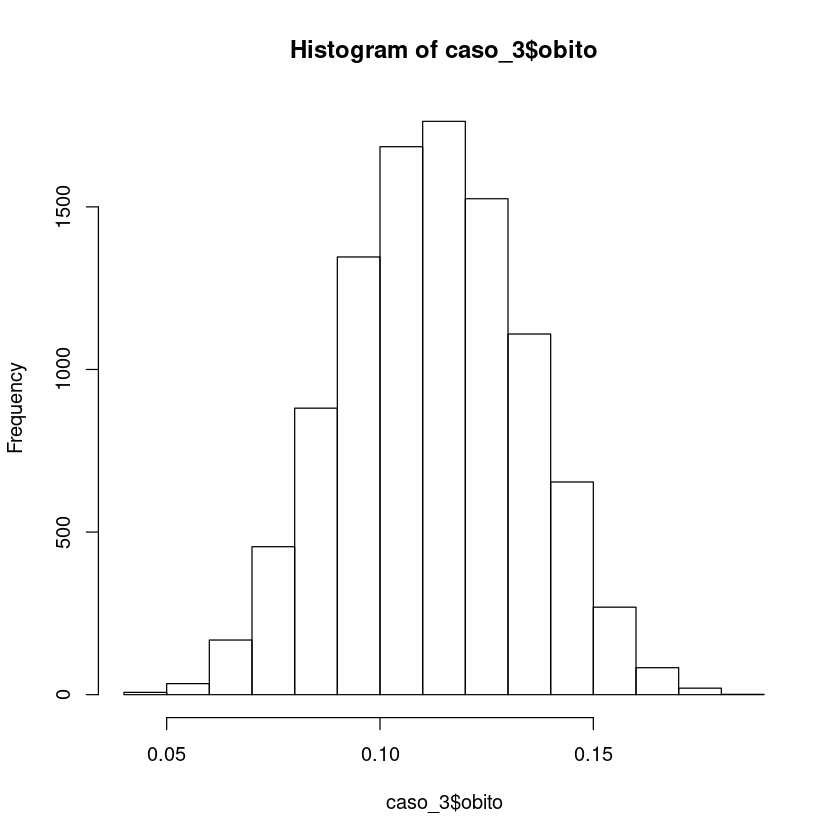

In [114]:
## Frequencia de Histograma para media o caso de obito 
caso_3 <- caso_3 %>% mutate(obito = obito / 1000) 
hist(caso_3$obito)

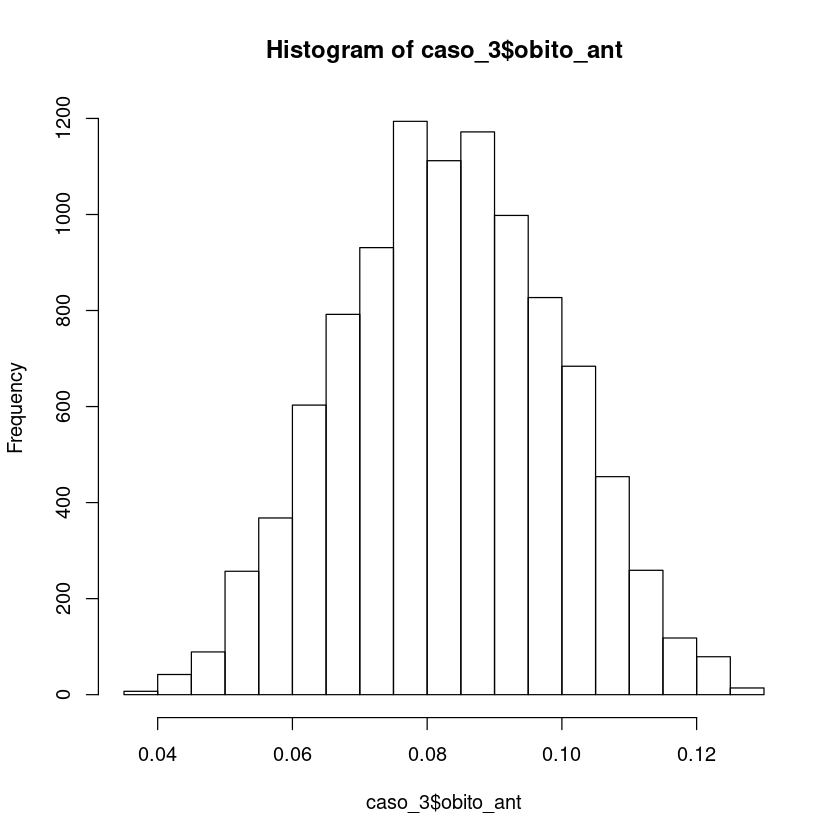

In [115]:
## Frequencia de Histograma para media o caso de obito_ant 
caso_3 <- caso_3 %>% mutate(obito_ant = obito_ant / 1000) 
hist(caso_3$obito_ant)

# Algoritmo de Matchit 

In [127]:
# Algoritmo de Matchit entre reg_pais1 e obito
mod_match1 <- matchit(pp ~ reg_pais1 + obito + obito_ant, method = "nearest", data = caso_3)
summary(mod_match1)

Warning message:
“Fewer control units than treated units; not all treated units will get a match.”



Call:
matchit(formula = pp ~ reg_pais1 + obito + obito_ant, data = caso_3, 
    method = "nearest")

Summary of Balance for All Data:
          Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance         0.9060        0.0959          4.0900     1.0326    0.4843
reg_pais1        0.4895        0.5028         -0.0267          .    0.0133
obito            0.1053        0.1197         -0.7144     1.0151    0.1752
obito_ant        0.0835        0.0830          0.0316     0.9888    0.0087
          eCDF Max
distance    0.8742
reg_pais1   0.0133
obito       0.2734
obito_ant   0.0207


Summary of Balance for Matched Data:
          Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance         0.9226        0.0959          4.1737     0.6869    0.4919
reg_pais1        0.4899        0.5028         -0.0259          .    0.0129
obito            0.1050        0.1197         -0.7280     1.0067    0.1786
obito_ant        0.0835        0.0830          0.0298   

In [128]:
# Algoritmo de Matchit entre reg_pais2 e obito
mod_match2 <- matchit(pp ~ reg_pais2 + obito + obito_ant, method = "nearest", data = caso_3)
summary(mod_match2)

Warning message:
“Fewer control units than treated units; not all treated units will get a match.”



Call:
matchit(formula = pp ~ reg_pais2 + obito + obito_ant, data = caso_3, 
    method = "nearest")

Summary of Balance for All Data:
          Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance         0.9060        0.0959          4.0914     1.0325    0.4844
reg_pais2        0.5051        0.4990          0.0123          .    0.0062
obito            0.1053        0.1197         -0.7144     1.0151    0.1752
obito_ant        0.0835        0.0830          0.0316     0.9888    0.0087
          eCDF Max
distance    0.8751
reg_pais2   0.0062
obito       0.2734
obito_ant   0.0207


Summary of Balance for Matched Data:
          Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance         0.9226        0.0959          4.1751     0.6866    0.4920
reg_pais2        0.5057        0.4990          0.0133          .    0.0067
obito            0.1050        0.1197         -0.7280     1.0063    0.1786
obito_ant        0.0835        0.0830          0.0298   

In [129]:
# Algoritmo de Matchit entre reg_pais3 e obito
mod_match3 <- matchit(pp ~ reg_pais3 + obito + obito_ant, method = "nearest", data = caso_3)
summary(mod_match3)

Warning message:
“Fewer control units than treated units; not all treated units will get a match.”



Call:
matchit(formula = pp ~ reg_pais3 + obito + obito_ant, data = caso_3, 
    method = "nearest")

Summary of Balance for All Data:
          Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance         0.9060        0.0959          4.0899     1.0326    0.4845
reg_pais3        0.5107        0.4956          0.0303          .    0.0151
obito            0.1053        0.1197         -0.7144     1.0151    0.1752
obito_ant        0.0835        0.0830          0.0316     0.9888    0.0087
          eCDF Max
distance    0.8742
reg_pais3   0.0151
obito       0.2734
obito_ant   0.0207


Summary of Balance for Matched Data:
          Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance         0.9226        0.0959          4.1737     0.6867    0.4920
reg_pais3        0.5103        0.4956          0.0295          .    0.0147
obito            0.1050        0.1197         -0.7280     1.0067    0.1786
obito_ant        0.0835        0.0830          0.0298   

In [130]:
# Algoritmo de Matchit entre reg_pais4 e obito
mod_match4 <- matchit(pp ~ reg_pais4 + obito + obito_ant, method = "nearest", data = caso_3)
summary(mod_match4)

Warning message:
“Fewer control units than treated units; not all treated units will get a match.”



Call:
matchit(formula = pp ~ reg_pais4 + obito + obito_ant, data = caso_3, 
    method = "nearest")

Summary of Balance for All Data:
          Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance         0.9060        0.0959          4.0907     1.0320    0.4844
reg_pais4        0.5079        0.4966          0.0227          .    0.0114
obito            0.1053        0.1197         -0.7144     1.0151    0.1752
obito_ant        0.0835        0.0830          0.0316     0.9888    0.0087
          eCDF Max
distance    0.8740
reg_pais4   0.0114
obito       0.2734
obito_ant   0.0207


Summary of Balance for Matched Data:
          Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance         0.9226        0.0959          4.1744     0.6864    0.4919
reg_pais4        0.5085        0.4966          0.0238          .    0.0119
obito            0.1050        0.1197         -0.7280     1.0067    0.1786
obito_ant        0.0835        0.0830          0.0298   

In [131]:
# Algoritmo de Matchit entre reg_pais4 e obito
mod_match4 <- matchit(pp ~ reg_pais4 + obito + obito_ant, method = "nearest", data = caso_3)
summary(mod_match4)

Warning message:
“Fewer control units than treated units; not all treated units will get a match.”



Call:
matchit(formula = pp ~ reg_pais4 + obito + obito_ant, data = caso_3, 
    method = "nearest")

Summary of Balance for All Data:
          Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance         0.9060        0.0959          4.0907     1.0320    0.4844
reg_pais4        0.5079        0.4966          0.0227          .    0.0114
obito            0.1053        0.1197         -0.7144     1.0151    0.1752
obito_ant        0.0835        0.0830          0.0316     0.9888    0.0087
          eCDF Max
distance    0.8740
reg_pais4   0.0114
obito       0.2734
obito_ant   0.0207


Summary of Balance for Matched Data:
          Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance         0.9226        0.0959          4.1744     0.6864    0.4919
reg_pais4        0.5085        0.4966          0.0238          .    0.0119
obito            0.1050        0.1197         -0.7280     1.0067    0.1786
obito_ant        0.0835        0.0830          0.0298   

In [132]:
# Algoritmo de Matchit entre reg_pais5 e obito
mod_match5 <- matchit(pp ~ reg_pais5 + obito + obito_ant, method = "nearest", data = caso_3)
summary(mod_match5)

Warning message:
“Fewer control units than treated units; not all treated units will get a match.”



Call:
matchit(formula = pp ~ reg_pais5 + obito + obito_ant, data = caso_3, 
    method = "nearest")

Summary of Balance for All Data:
          Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance         0.9060        0.0959          4.0899     1.0327    0.4844
reg_pais5        0.5071        0.4937          0.0268          .    0.0134
obito            0.1053        0.1197         -0.7144     1.0151    0.1752
obito_ant        0.0835        0.0830          0.0316     0.9888    0.0087
          eCDF Max
distance    0.8742
reg_pais5   0.0134
obito       0.2734
obito_ant   0.0207


Summary of Balance for Matched Data:
          Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance         0.9226        0.0959          4.1736     0.6870    0.4919
reg_pais5        0.5065        0.4937          0.0255          .    0.0127
obito            0.1050        0.1197         -0.7280     1.0067    0.1786
obito_ant        0.0835        0.0830          0.0298   

In [133]:
# Algoritmo de Matchit entre reg_pais6 e obito
mod_match6 <- matchit(pp ~ reg_pais6 + obito + obito_ant, method = "nearest", data = caso_3)
summary(mod_match6)

Warning message:
“Fewer control units than treated units; not all treated units will get a match.”



Call:
matchit(formula = pp ~ reg_pais6 + obito + obito_ant, data = caso_3, 
    method = "nearest")

Summary of Balance for All Data:
          Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance         0.9062        0.0957          4.0907     1.0379    0.4844
reg_pais6        0.5168        0.5095          0.0147          .    0.0073
obito            0.1053        0.1197         -0.7144     1.0151    0.1752
obito_ant        0.0835        0.0830          0.0316     0.9888    0.0087
          eCDF Max
distance    0.8731
reg_pais6   0.0073
obito       0.2734
obito_ant   0.0207


Summary of Balance for Matched Data:
          Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance         0.9228        0.0957          4.1744     0.6903    0.4920
reg_pais6        0.5158        0.5095          0.0125          .    0.0063
obito            0.1050        0.1197         -0.7277     1.0068    0.1785
obito_ant        0.0835        0.0830          0.0301   

##  Novo banco de dados só com os pareados

In [134]:
dat_m <- match.data(mod_match)

In [135]:
head(dat_m) 

id,pp,reg_pais1,reg_pais2,reg_pais3,reg_pais4,reg_pais5,reg_pais6,obito_ant,obito,distance,weights,subclass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0,1,1,0,1,0,1,0.071734,0.10592,0.009871933,1,1422
2,0,1,0,0,0,0,1,0.086913,0.12493,0.007115449,1,2607
3,0,0,1,0,1,1,0,0.072985,0.10693,0.013515522,1,107
4,1,0,0,1,1,1,0,0.091888,0.11664,0.981648276,1,1599
5,0,0,0,0,0,0,0,0.062233,0.09301,0.022445469,1,3690
6,0,1,1,0,0,0,1,0.076610,0.10403,0.563928654,1,2243


In [136]:
dim(dat_m)

[1] 9900   13

## Caso Pareado de Teste 

## PP

In [139]:
with(dat_m, t.test(obito ~ pp))


	Welch Two Sample t-test

data:  obito by pp
t = 36.427, df = 9897.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.01388448 0.01546376
sample estimates:
mean in group 0 mean in group 1 
      0.1196653       0.1049912 


In [140]:
with(dat_m, t.test(obito_ant ~ pp))


	Welch Two Sample t-test

data:  obito_ant by pp
t = -1.4798, df = 9897.7, p-value = 0.139
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0011107627  0.0001551332
sample estimates:
mean in group 0 mean in group 1 
     0.08302845      0.08350626 


## reg_pais1

In [141]:
with(dat_m, t.test(obito ~ reg_pais1))


	Welch Two Sample t-test

data:  obito by reg_pais1
t = 23.368, df = 9897.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.008939153 0.010576189
sample estimates:
mean in group 0 mean in group 1 
      0.1171716       0.1074139 


In [142]:
with(dat_m, t.test(obito_ant ~ reg_pais1))


	Welch Two Sample t-test

data:  obito_ant by reg_pais1
t = 26.76, df = 9896.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.007732787 0.008955185
sample estimates:
mean in group 0 mean in group 1 
     0.08740900      0.07906502 


## reg_pais2

In [143]:
with(dat_m, t.test(obito ~ reg_pais2))


	Welch Two Sample t-test

data:  obito by reg_pais2
t = 29.852, df = 9893, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.01146117 0.01307213
sample estimates:
mean in group 0 mean in group 1 
      0.1184864       0.1062197 


In [144]:
with(dat_m, t.test(obito_ant ~ reg_pais2))


	Welch Two Sample t-test

data:  obito_ant by reg_pais2
t = 33.21, df = 9895.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.009572802 0.010773749
sample estimates:
mean in group 0 mean in group 1 
     0.08837454      0.07820127 


## reg_pais3

In [145]:
with(dat_m, t.test(obito ~ reg_pais3))


	Welch Two Sample t-test

data:  obito by reg_pais3
t = -13.77, df = 9897.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.006683901 -0.005018073
sample estimates:
mean in group 0 mean in group 1 
      0.1093856       0.1152366 


In [146]:
with(dat_m, t.test(obito_ant ~ reg_pais3))


	Welch Two Sample t-test

data:  obito_ant by reg_pais3
t = -15.878, df = 9897.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.005688614 -0.004438404
sample estimates:
mean in group 0 mean in group 1 
     0.08072077      0.08578427 


## reg_pais4

In [147]:
with(dat_m, t.test(obito ~ reg_pais4))


	Welch Two Sample t-test

data:  obito by reg_pais4
t = -29.352, df = 9897.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01288379 -0.01127069
sample estimates:
mean in group 0 mean in group 1 
      0.1062591       0.1183364 


In [148]:
with(dat_m, t.test(obito_ant ~ reg_pais4))


	Welch Two Sample t-test

data:  obito_ant by reg_pais4
t = -33.205, df = 9896.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.010772086 -0.009571143
sample estimates:
mean in group 0 mean in group 1 
     0.07815586      0.08832747 


## reg_pais5

In [149]:
with(dat_m, t.test(obito ~ reg_pais5))


	Welch Two Sample t-test

data:  obito by reg_pais5
t = -44.901, df = 9895, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01832308 -0.01679015
sample estimates:
mean in group 0 mean in group 1 
      0.1035482       0.1211048 


In [151]:
with(dat_m, t.test(obito_ant ~ reg_pais5))


	Welch Two Sample t-test

data:  obito_ant by reg_pais5
t = -51.173, df = 9896.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01525840 -0.01413256
sample estimates:
mean in group 0 mean in group 1 
     0.07591813      0.09061361 


## reg_pais6

In [152]:
with(dat_m, t.test(obito ~ reg_pais6))


	Welch Two Sample t-test

data:  obito by reg_pais6
t = -66.163, df = 9877.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02433957 -0.02293885
sample estimates:
mean in group 0 mean in group 1 
      0.1001934       0.1238327 


In [153]:
with(dat_m, t.test(obito_ant ~ reg_pais6))


	Welch Two Sample t-test

data:  obito_ant by reg_pais6
t = -78.003, df = 9880.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02032491 -0.01932843
sample estimates:
mean in group 0 mean in group 1 
     0.07308966      0.09291633 


## Regressão Linear 

## PP 

In [154]:
rl_obito_pp <- lm(obito ~ pp, data = dat_m)
summary(rl_obito_pp)


Call:
lm(formula = obito ~ pp, data = dat_m)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.059461 -0.014137 -0.000081  0.014105  0.065849 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1196653  0.0002848  420.10   <2e-16 ***
pp          -0.0146741  0.0004028  -36.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02004 on 9898 degrees of freedom
Multiple R-squared:  0.1182,	Adjusted R-squared:  0.1181 
F-statistic:  1327 on 1 and 9898 DF,  p-value: < 2.2e-16


In [155]:
rl_obito_ant_pp <- lm(obito_ant ~ pp, data = dat_m)
summary(rl_obito_ant_pp)


Call:
lm(formula = obito_ant ~ pp, data = dat_m)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.045065 -0.011426  0.000061  0.011401  0.045542 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0830284  0.0002283  363.64   <2e-16 ***
pp          0.0004778  0.0003229    1.48    0.139    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01606 on 9898 degrees of freedom
Multiple R-squared:  0.0002212,	Adjusted R-squared:  0.0001202 
F-statistic:  2.19 on 1 and 9898 DF,  p-value: 0.139


## reg_pais1

In [160]:
rl_obito_reg_pais1 <- lm(obito ~ reg_pais1, data = dat_m)
summary(rl_obito_reg_pais1)


Call:
lm(formula = obito ~ reg_pais1, data = dat_m)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.065942 -0.014296  0.000012  0.014867  0.071156 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1171716  0.0002942  398.22   <2e-16 ***
reg_pais1   -0.0097577  0.0004176  -23.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02078 on 9898 degrees of freedom
Multiple R-squared:  0.05227,	Adjusted R-squared:  0.05217 
F-statistic: 545.9 on 1 and 9898 DF,  p-value: < 2.2e-16


In [161]:
rl_obito_ant_reg_pais1 <- lm(obito_ant ~ reg_pais1, data = dat_m)
summary(rl_obito_ant_reg_pais1)


Call:
lm(formula = obito_ant ~ reg_pais1, data = dat_m)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.040823 -0.010920 -0.000047  0.011088  0.041639 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0874090  0.0002197  397.82   <2e-16 ***
reg_pais1   -0.0083440  0.0003119  -26.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01551 on 9898 degrees of freedom
Multiple R-squared:  0.06744,	Adjusted R-squared:  0.06735 
F-statistic: 715.8 on 1 and 9898 DF,  p-value: < 2.2e-16


## reg_pais2

In [162]:
rl_obito_reg_pais2 <- lm(obito ~ reg_pais2, data = dat_m)
summary(rl_obito_reg_pais2)


Call:
lm(formula = obito ~ reg_pais2, data = dat_m)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.060690 -0.014640  0.000042  0.014341  0.062724 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1184864  0.0002911  406.99   <2e-16 ***
reg_pais2   -0.0122667  0.0004109  -29.85   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02044 on 9898 degrees of freedom
Multiple R-squared:  0.0826,	Adjusted R-squared:  0.08251 
F-statistic: 891.2 on 1 and 9898 DF,  p-value: < 2.2e-16


In [163]:
rl_obito_ant_reg_pais2 <- lm(obito_ant ~ reg_pais2, data = dat_m)
summary(rl_obito_ant_reg_pais2)


Call:
lm(formula = obito_ant ~ reg_pais2, data = dat_m)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.040371 -0.010970 -0.000149  0.011044  0.040673 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0883745  0.0002170  407.18   <2e-16 ***
reg_pais2   -0.0101733  0.0003063  -33.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01524 on 9898 degrees of freedom
Multiple R-squared:  0.1003,	Adjusted R-squared:  0.1002 
F-statistic:  1103 on 1 and 9898 DF,  p-value: < 2.2e-16


## reg_pais3

In [164]:
rl_obito_reg_pais3 <- lm(obito ~ reg_pais3, data = dat_m)
summary(rl_obito_reg_pais3)


Call:
lm(formula = obito ~ reg_pais3, data = dat_m)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.069707 -0.015077 -0.000111  0.014857  0.066494 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.1093856  0.0003014  362.97   <2e-16 ***
reg_pais3   0.0058510  0.0004249   13.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02114 on 9898 degrees of freedom
Multiple R-squared:  0.01879,	Adjusted R-squared:  0.01869 
F-statistic: 189.6 on 1 and 9898 DF,  p-value: < 2.2e-16


In [165]:
rl_obito_ant_reg_pais3 <- lm(obito_ant ~ reg_pais3, data = dat_m)
summary(rl_obito_ant_reg_pais3)


Call:
lm(formula = obito_ant ~ reg_pais3, data = dat_m)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.042280 -0.011210 -0.000027  0.011357  0.043342 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0807208  0.0002262  356.92   <2e-16 ***
reg_pais3   0.0050635  0.0003189   15.88   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01587 on 9898 degrees of freedom
Multiple R-squared:  0.02484,	Adjusted R-squared:  0.02474 
F-statistic: 252.1 on 1 and 9898 DF,  p-value: < 2.2e-16


## reg_pais4

In [166]:
rl_obito_pais4 <- lm(obito ~ reg_pais4, data = dat_m)
summary(rl_obito_pais4)


Call:
lm(formula = obito ~ reg_pais4, data = dat_m)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.060729 -0.014471 -0.000041  0.014461  0.062874 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.1062591  0.0002917  364.30   <2e-16 ***
reg_pais4   0.0120772  0.0004115   29.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02047 on 9898 degrees of freedom
Multiple R-squared:  0.08007,	Adjusted R-squared:  0.07998 
F-statistic: 861.5 on 1 and 9898 DF,  p-value: < 2.2e-16


In [168]:
rl_obito_ant_pais4 <- lm(obito_ant ~ reg_pais4, data = dat_m)
summary(rl_obito_ant_pais4)


Call:
lm(formula = obito_ant ~ reg_pais4, data = dat_m)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03972 -0.01092 -0.00010  0.01086  0.04174 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0781559  0.0002172   359.9   <2e-16 ***
reg_pais4   0.0101716  0.0003063    33.2   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01524 on 9898 degrees of freedom
Multiple R-squared:  0.1002,	Adjusted R-squared:  0.1001 
F-statistic:  1103 on 1 and 9898 DF,  p-value: < 2.2e-16


## reg_pais5

In [169]:
rl_obito_pais5 <- lm(obito ~ reg_pais5, data = dat_m)
summary(rl_obito_pais5)


Call:
lm(formula = obito ~ reg_pais5, data = dat_m)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.058018 -0.013885  0.000092  0.013768  0.060105 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.1035482  0.0002765   374.5   <2e-16 ***
reg_pais5   0.0175566  0.0003910    44.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01945 on 9898 degrees of freedom
Multiple R-squared:  0.1692,	Adjusted R-squared:  0.1691 
F-statistic:  2016 on 1 and 9898 DF,  p-value: < 2.2e-16


In [170]:
rl_obito_ant_pais5 <- lm(obito_ant ~ reg_pais5, data = dat_m)
summary(rl_obito_ant_pais5)


Call:
lm(formula = obito_ant ~ reg_pais5, data = dat_m)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.037477 -0.010656  0.000039  0.010632  0.038434 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0759181  0.0002031  373.83   <2e-16 ***
reg_pais5   0.0146955  0.0002872   51.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01429 on 9898 degrees of freedom
Multiple R-squared:  0.2092,	Adjusted R-squared:  0.2091 
F-statistic:  2619 on 1 and 9898 DF,  p-value: < 2.2e-16


## reg_pais6 

In [172]:
rl_obito_pais6 <- lm(obito ~ reg_pais6, data = dat_m)
summary(rl_obito_pais6)


Call:
lm(formula = obito ~ reg_pais6, data = dat_m)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.055023 -0.012493 -0.000083  0.012307  0.057377 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.1001934  0.0002560  391.32   <2e-16 ***
reg_pais6   0.0236392  0.0003574   66.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01777 on 9898 degrees of freedom
Multiple R-squared:  0.3066,	Adjusted R-squared:  0.3065 
F-statistic:  4376 on 1 and 9898 DF,  p-value: < 2.2e-16


In [173]:
rl_obito_ant_pais6 <- lm(obito_ant ~ reg_pais6, data = dat_m)
summary(rl_obito_ant_pais6)


Call:
lm(formula = obito_ant ~ reg_pais6, data = dat_m)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.035065 -0.008930  0.000055  0.008923  0.036132 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0730897  0.0001822  401.22   <2e-16 ***
reg_pais6   0.0198267  0.0002543   77.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01264 on 9898 degrees of freedom
Multiple R-squared:  0.3806,	Adjusted R-squared:  0.3805 
F-statistic:  6081 on 1 and 9898 DF,  p-value: < 2.2e-16


## Regressão Linear Geral 

## PP  com reg_pais1

In [176]:
rl_geral <- lm(pp ~ reg_pais1  + obito_ant + I(obito / 10^3), data = dat_m)
summary(rl_geral)


Call:
lm(formula = pp ~ reg_pais1 + obito_ant + I(obito/10^3), data = dat_m)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89478 -0.18779  0.00299  0.19138  0.70239 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)    1.022e+00  1.598e-02   63.976   <2e-16 ***
reg_pais1      4.733e-03  5.560e-03    0.851    0.395    
obito_ant      5.692e+01  3.986e-01  142.798   <2e-16 ***
I(obito/10^3) -4.686e+04  2.976e+02 -157.444   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2671 on 9896 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7147 
F-statistic:  8266 on 3 and 9896 DF,  p-value: < 2.2e-16


## PP com reg_pais2

In [177]:
rl_geral_2 <- lm(pp ~ reg_pais2  + obito_ant + I(obito / 10^3), data = dat_m)
summary(rl_geral_2)


Call:
lm(formula = pp ~ reg_pais2 + obito_ant + I(obito/10^3), data = dat_m)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88861 -0.18622  0.00395  0.19148  0.69966 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.013e+00  1.642e-02   61.68   <2e-16 ***
reg_pais2      1.098e-02  5.659e-03    1.94   0.0524 .  
obito_ant      5.698e+01  3.991e-01  142.76   <2e-16 ***
I(obito/10^3) -4.686e+04  2.975e+02 -157.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.267 on 9896 degrees of freedom
Multiple R-squared:  0.7149,	Adjusted R-squared:  0.7148 
F-statistic:  8270 on 3 and 9896 DF,  p-value: < 2.2e-16


## PP com reg_pais3

In [178]:
rl_geral_3 <- lm(pp ~ reg_pais3  + obito_ant + I(obito / 10^3), data = dat_m)
summary(rl_geral_3)


Call:
lm(formula = pp ~ reg_pais3 + obito_ant + I(obito/10^3), data = dat_m)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89080 -0.18722  0.00391  0.19081  0.70483 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)    1.027e+00  1.463e-02   70.228   <2e-16 ***
reg_pais3      9.482e-04  5.437e-03    0.174    0.862    
obito_ant      5.687e+01  3.966e-01  143.389   <2e-16 ***
I(obito/10^3) -4.686e+04  2.976e+02 -157.429   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2671 on 9896 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7147 
F-statistic:  8266 on 3 and 9896 DF,  p-value: < 2.2e-16


## PP com reg_pais4

In [182]:
rl_geral_4 <- lm(pp ~ reg_pais4  + obito_ant + I(obito / 10^3), data = dat_m)
summary(rl_geral_4)


Call:
lm(formula = pp ~ reg_pais4 + obito_ant + I(obito/10^3), data = dat_m)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89121 -0.18715  0.00375  0.19081  0.70484 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)    1.027e+00  1.473e-02   69.764   <2e-16 ***
reg_pais4     -7.560e-04  5.660e-03   -0.134    0.894    
obito_ant      5.688e+01  3.998e-01  142.289   <2e-16 ***
I(obito/10^3) -4.686e+04  2.976e+02 -157.440   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2671 on 9896 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7147 
F-statistic:  8266 on 3 and 9896 DF,  p-value: < 2.2e-16


## PP com reg_pais5

In [183]:
rl_geral_5 <- lm(pp ~ reg_pais5  + obito_ant + I(obito / 10^3), data = dat_m)
summary(rl_geral_5)


Call:
lm(formula = pp ~ reg_pais5 + obito_ant + I(obito/10^3), data = dat_m)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89132 -0.18729  0.00385  0.19055  0.70420 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)    1.027e+00  1.519e-02   67.643   <2e-16 ***
reg_pais5     -5.274e-04  6.038e-03   -0.087     0.93    
obito_ant      5.688e+01  4.052e-01  140.369   <2e-16 ***
I(obito/10^3) -4.686e+04  2.976e+02 -157.441   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2671 on 9896 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7147 
F-statistic:  8266 on 3 and 9896 DF,  p-value: < 2.2e-16


## PP com reg_pais6

In [184]:
rl_geral_6 <- lm(pp ~ reg_pais6  + obito_ant + I(obito / 10^3), data = dat_m)
summary(rl_geral_6)


Call:
lm(formula = pp ~ reg_pais6 + obito_ant + I(obito/10^3), data = dat_m)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89146 -0.18692  0.00403  0.19016  0.71701 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)    1.006e+00  1.636e-02   61.526  < 2e-16 ***
reg_pais6     -1.983e-02  6.822e-03   -2.907  0.00365 ** 
obito_ant      5.727e+01  4.182e-01  136.960  < 2e-16 ***
I(obito/10^3) -4.687e+04  2.975e+02 -157.540  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.267 on 9896 degrees of freedom
Multiple R-squared:  0.715,	Adjusted R-squared:  0.7149 
F-statistic:  8276 on 3 and 9896 DF,  p-value: < 2.2e-16
